# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
metric = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={metric}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | nchelenge
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | sandnessjoen
Processing Record 6 of Set 1 | la sarre
Processing Record 7 of Set 1 | wainwright
Processing Record 8 of Set 1 | cesme
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | tazacorte
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | colonia
Processing Record 16 of Set 1 | ola
Processing Record 17 of Set 1 | swift current
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | waitangi
Processing Record 23 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,9.73,91,100,1.53,ZA,1691264117
1,nchelenge,-9.3451,28.7340,20.31,49,0,2.32,ZM,1691264118
2,hithadhoo,-0.6000,73.0833,27.14,77,100,3.12,MV,1691264119
3,namibe,-15.1961,12.1522,18.40,86,0,1.83,AO,1691264119
4,sandnessjoen,66.0217,12.6316,12.29,72,88,1.17,NO,1691264120


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,9.73,91,100,1.53,ZA,1691264117
1,nchelenge,-9.3451,28.7340,20.31,49,0,2.32,ZM,1691264118
2,hithadhoo,-0.6000,73.0833,27.14,77,100,3.12,MV,1691264119
3,namibe,-15.1961,12.1522,18.40,86,0,1.83,AO,1691264119
4,sandnessjoen,66.0217,12.6316,12.29,72,88,1.17,NO,1691264120


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

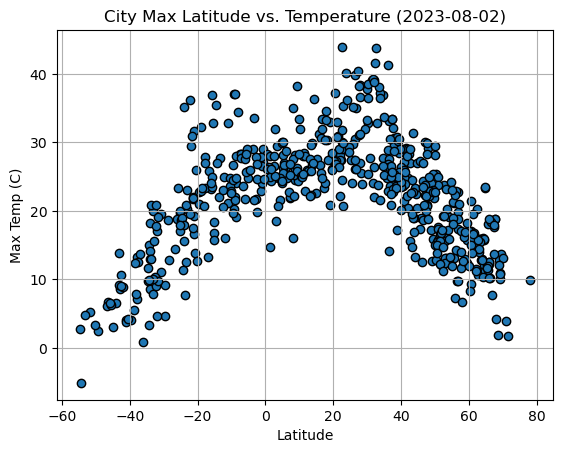

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x,y, marker='o', edgecolors='black')

# Incorporate the other graph properties

plt.title("City Max Latitude vs. Temperature (2023-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

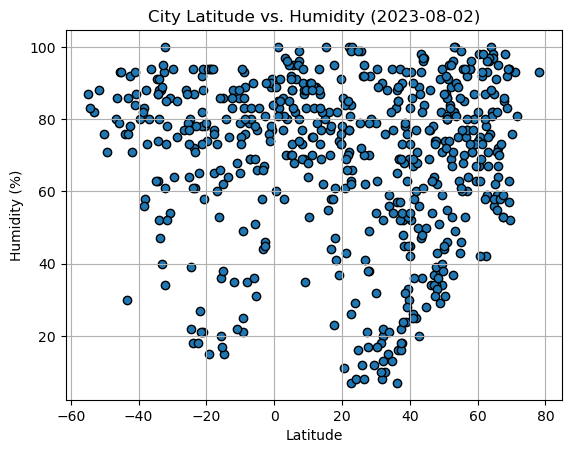

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-08-02)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

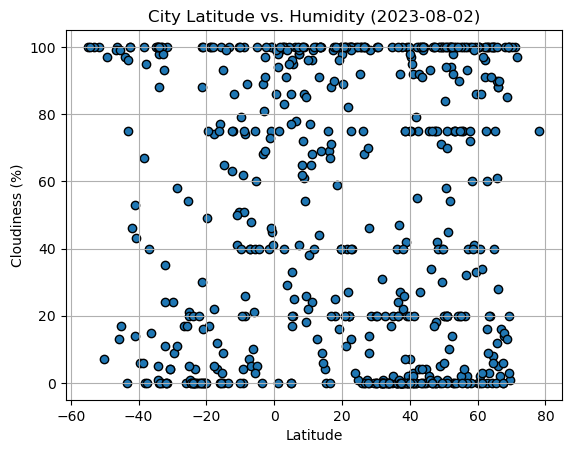

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-08-02)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

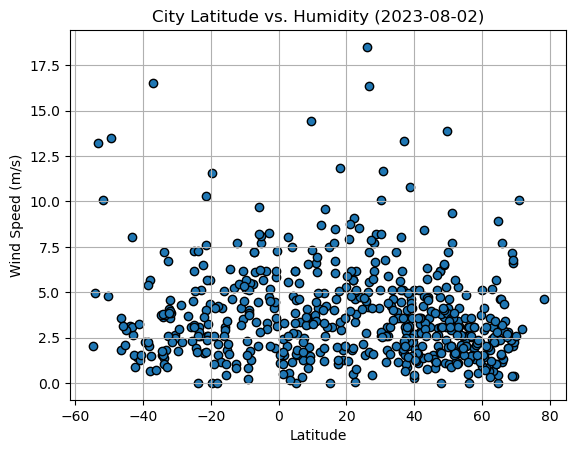

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-08-02)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"]<=0].index)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,sandnessjoen,66.0217,12.6316,12.29,72,88,1.17,NO,1691264120
5,la sarre,48.8002,-79.1996,23.83,29,5,3.64,CA,1691264120
6,wainwright,52.8390,-110.8572,23.82,37,0,5.27,CA,1691264121
7,cesme,38.3228,26.3064,28.84,45,0,2.06,TR,1691264121
8,vorgashor,67.5833,63.9500,17.65,53,0,2.83,RU,1691264122


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"]>=0].index)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,9.73,91,100,1.53,ZA,1691264117
1,nchelenge,-9.3451,28.7340,20.31,49,0,2.32,ZM,1691264118
2,hithadhoo,-0.6000,73.0833,27.14,77,100,3.12,MV,1691264119
3,namibe,-15.1961,12.1522,18.40,86,0,1.83,AO,1691264119
9,puerto natales,-51.7236,-72.4875,5.22,88,100,10.06,CL,1691264122


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6485573227375167


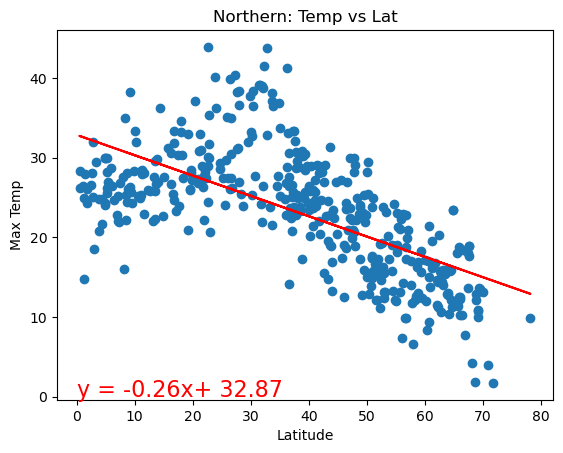

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq =  "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")

plt.title("Northern: Temp vs Lat")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


plt.annotate(line_eq, (0,0), fontsize = 16, color="red")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.8019814064836752


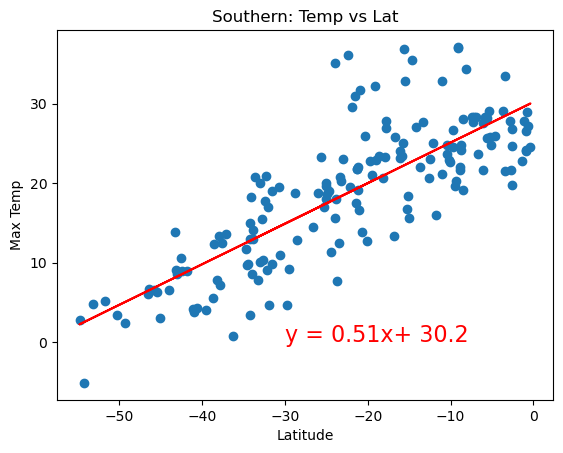

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq =  "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")

plt.title("Southern: Temp vs Lat")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (-30,0), fontsize = 16, color="red")
print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** 
In both the Northern and Southern hemisphere there is a correlation between latitude and temperature. The correlation in the Northern Hemisphere is weakly negative meaning that the higher the latitude the colder the temperature gets. In the Southern hemisphere there is a positive correlation meaning that as the latitude increases so does the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0028878408746519754


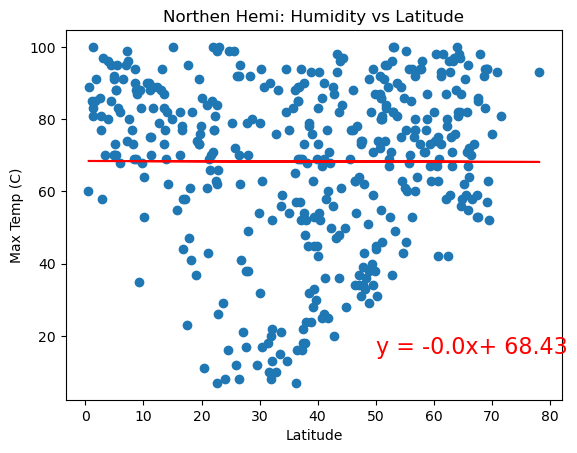

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq =  "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.title("Northen Hemi: Humidity vs Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq, (50,15), fontsize = 16, color="red")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.1798654053372607


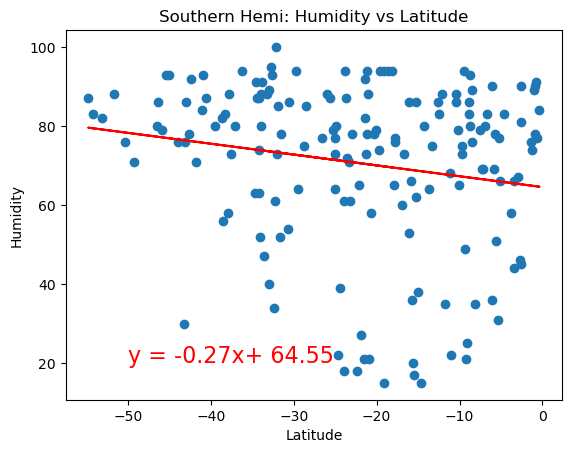

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq =  "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemi: Humidity vs Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq, (-50,20), fontsize = 16, color="red")
print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere there is a near zero r-value which indicates there is not much correlation between the humidity and the latitude. In the Southern Hemisphere there is a small negative correlation between humidity and latitude. So the closer the city to the equator the more humid it tends to be. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.09901361101545195


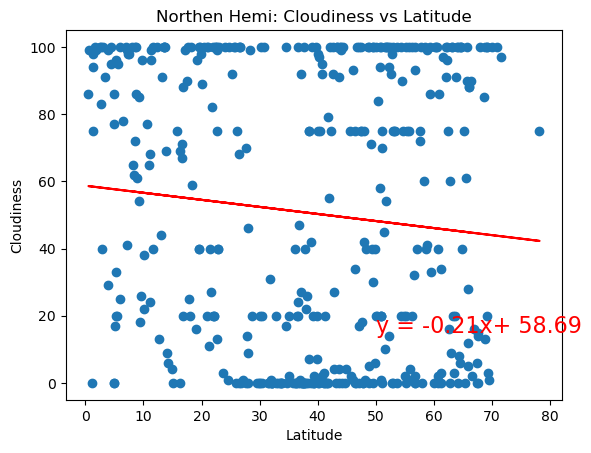

In [31]:
# Northern Hemisphere
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq =  "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.title("Northen Hemi: Cloudiness vs Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (50,15), fontsize = 16, color="red")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.03694663044756907


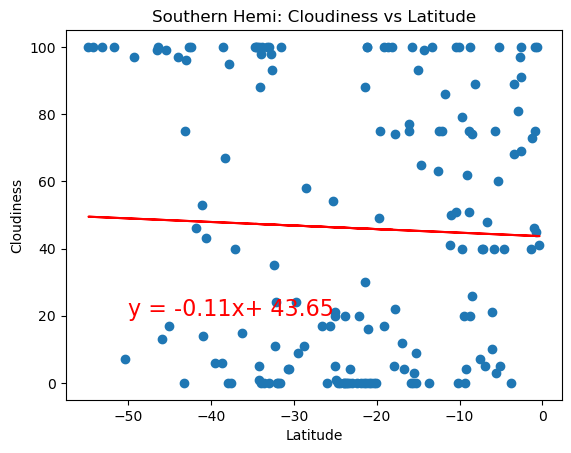

In [32]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq =  "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemi: Cloudiness vs Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (-50,20), fontsize = 16, color="red")
print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** 
The correlation between both Northern and Southern hemisphere are weakly negative. This is an interesting find becasue it indicates that cities closer to the equator are less cloudy and cities closer to the northern and southern poles tend to be cloudier. The r-value is quite weak so more data is needed to make a definitive call. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.17246166544755043


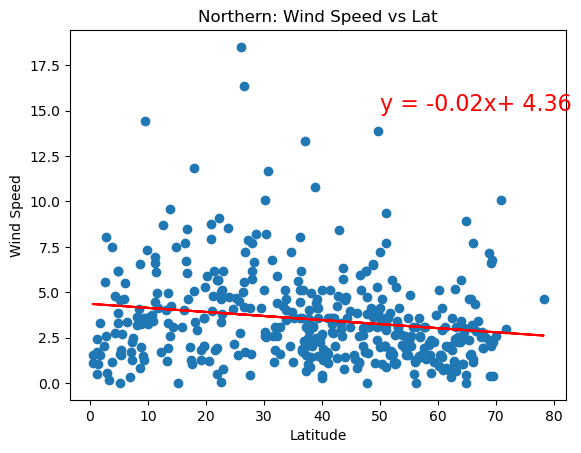

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq =  "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")

plt.title("Northern: Wind Speed vs Lat")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq, (50,15), fontsize = 16, color="red")
print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.05906394294582218


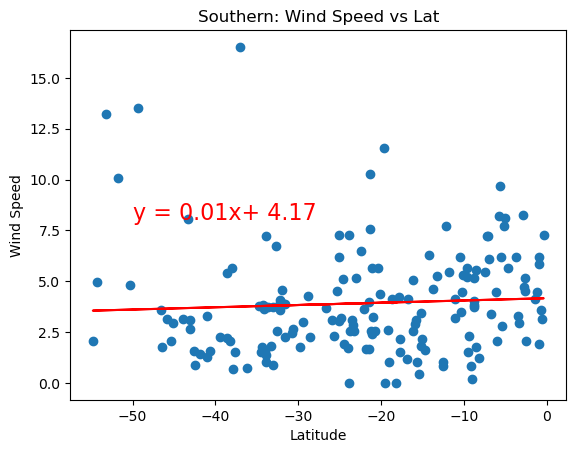

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq =  "y = " +str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values, regress_values, "r-")

plt.title("Southern: Wind Speed vs Lat")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq, (-50,8), fontsize = 16, color="red")
print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** 
The correlation between wind speed and latitude in both hemisphere are near zero indicating that there is no relationship between the wind speed of a city and its wind speed. 